We'll use a Python package `wordcloud` to make word clouds. To install, in your terminal type:

`pip install wordcloud`

If you don't have/know pip, you can manually install:

1. Download the package from [https://github.com/amueller/word_cloud/archive/master.zip](https://github.com/amueller/word_cloud/archive/master.zip) and unzip the file.

2. In your terminal, go to that folder (` cd word_cloud-master`)

3. Install the requirements:

`sudo pip install -r requirements.txt`

Install the package:

python setup.py install

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from wordcloud import WordCloud
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('imdb.csv', sep = '\t')
df.head(2)

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
1,#1 Single,2006,6.1,61


The `wordcloud` package takes a string as its input, so we'll make the titles into a big string.

In [4]:
text = ' '.join([i for i in df.Title.tolist()])

In [5]:
text[0:30]

'!Next? #1 Single #7DaysLater #'

In [6]:
wordcloud = WordCloud(max_font_size=40, max_words = 200, background_color="white").generate(text)

Note that you can tune these parameters, the options can be found [here](https://github.com/amueller/word_cloud/blob/master/examples/masked.py).

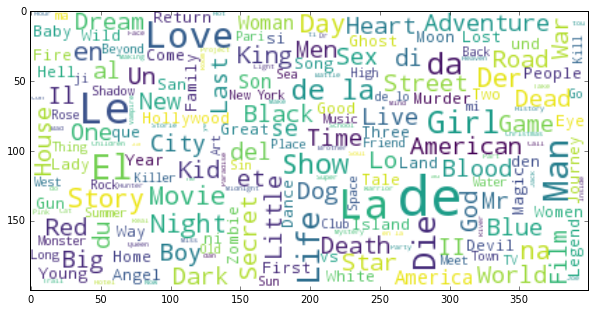

In [7]:
plt.figure(figsize = (10,7))
plt.imshow(wordcloud)

I'll make a function because we'll do this multiple times.

In [8]:
def draw_wordcloud(s):
    wordcloud = WordCloud(max_font_size=40, max_words = 200, background_color="white").generate(s)
    plt.figure(figsize = (10,7))
    plt.imshow(wordcloud)

What do you think about the word cloud? Are the words really meaningful?
Answer :

- There are many unmeaningful words in the wordcloud
- THe wordcloud has many words of the same size which could make no sense as there are too many words with equal weightage and it would be hard to scrutinize and discriminate the words

In [9]:
import nltk
#nltk.download()

In [10]:
tokens = nltk.tokenize.word_tokenize(text)

In [11]:
tokens[0:10]

['!', 'Next', '?', '#', '1', 'Single', '#', '7DaysLater', '#', 'Bikerlive']

There are a lot of non-word symbols. Let's get rid of them.

TODO: remove the numbers and symbols in the tokens. Hint: you can use Python's [isalpha](https://docs.python.org/3/library/stdtypes.html#str.isalpha) function. After removal, it should look like the following:

In [12]:
tokens2=list()

for i in range(0, 888633):
    if tokens[i].isalpha():
        tokens2.append(tokens[i])
        

In [13]:
tokens=list()
tokens=tokens2

Some of these words, like "My", are not really meaningful: these are the so-called stopwords. We can pick them out and remove them. NLTK provides a list of common stop words.

In [14]:
from nltk.corpus import stopwords

In [15]:
st = stopwords.words('english')
st[0:5]

['i', 'me', 'my', 'myself', 'we']

In [16]:
tokens2=list()

for i in range(0, len(tokens)-1):
    if tokens[i].lower() not in st:
        tokens2.append(tokens[i])
        
        

In [17]:

tokens=list()
tokens=tokens2

tokens2[0:10]

['Next',
 'Single',
 'Bikerlive',
 'ByMySide',
 'LawstinWoods',
 'lovemilla',
 'nitTWITS',
 'Dad',
 'Says',
 'Chance']

In [18]:
text = ' '.join([i for i in tokens])

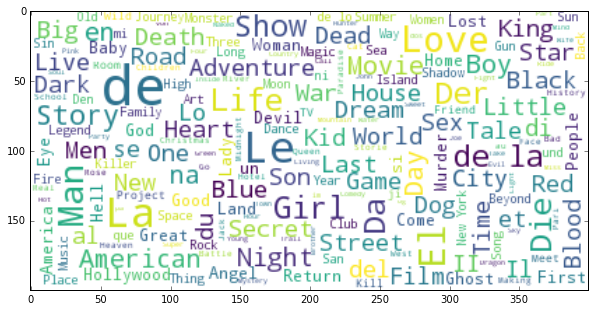

In [19]:
draw_wordcloud(text)

Maybe a little better, but not much?

Answer:
    
    
    - This looks a little better but there are more words that are unwanted in this list, so to make it better we could remove those words



We can also add words to the stopword list. In our case, we probably don't want the words like "One" on the picture.

In [20]:
st.append("lo")

In [21]:
#TODO: add other words that are not meaningful and re-create the word cloud.
#st.append("lo")
st.append("mi")
st.append("si")

In [28]:
import itertools
df2 = pd.read_csv('word.csv')

k= df2.values.tolist()

lst = list(itertools.chain(*k))


In [29]:
s= set()

for i in lst:
    s.add(i)

s1= set()
for i in tokens:
    s1.add(i)

common = s & s1

tokens=list(common)
    

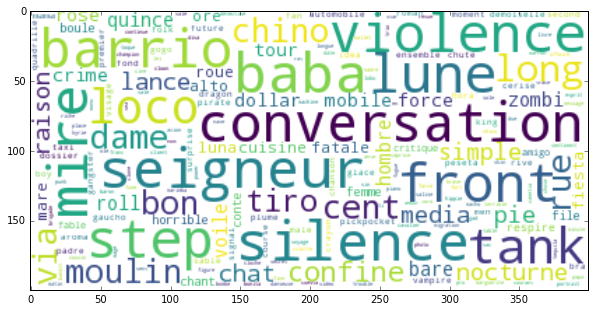

In [33]:
merged_text = ' '.join([i for i in common])


draw_wordcloud(merged_text)

In [40]:
tokens

['machina',
 'prisons',
 'polis',
 'hinter',
 'lectures',
 'deux',
 'stark',
 'gamine',
 'erst',
 'cap',
 'eaux',
 'indigo',
 'immense',
 'seigneur',
 'habits',
 'coda',
 'dune',
 'hum',
 'filles',
 'cottage',
 'rouleau',
 'explore',
 'toner',
 'super',
 'til',
 'stork',
 'obi',
 'history',
 'signori',
 'latino',
 'sad',
 'fate',
 'empire',
 'fracture',
 'barrios',
 'absolute',
 'leu',
 'opera',
 'mn',
 'mea',
 'gong',
 'oh',
 'cappella',
 'toilette',
 'romaine',
 'jinn',
 'nine',
 'corps',
 'december',
 'meg',
 'natation',
 'silence',
 'merci',
 'classer',
 'ling',
 'faller',
 'happened',
 'pose',
 'mantel',
 'aspect',
 'breves',
 'bingo',
 'kike',
 'crisis',
 'illegal',
 'frissons',
 'nova',
 'puzzle',
 'baba',
 'carne',
 'conception',
 'damnation',
 'richter',
 'chignon',
 'conversation',
 'bras',
 'forma',
 'plumes',
 'sept',
 'violence',
 'ii',
 'continuo',
 'coco',
 'serum',
 'job',
 'slags',
 'relax',
 'define',
 'barrio',
 'front',
 'cheval',
 'fores',
 'collectives',
 'eh',
 '

Now we finally have a plot where most of the words we can make sense of. However, it seems still not very informative.

The most frequent words in a collection of texts may not be the most meaningful ones. To address this, there is a popular method called [TFIDF](http://www.tfidf.com/). In short, it is a way for evaluating the "importance" of words. We can pick out the most important words and draw a word cloud with them. sklearn has [an implementation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for this.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF works with a set of documents. Here I'll just divide the tokens into short sublists.

In [46]:
text = np.split(np.asarray(tokens), len(tokens)/5)
text = [' '.join([j for j in i.tolist()]) for i in text]

In [48]:
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit_transform(text)
tokens = vectorizer.get_feature_names()

By setting `max_features=1000`, I'm telling the vectorizer to only keep the top 1000 words with highest TFIDF scores. You can change this parameter and see how it influences the output.

In [50]:
#TODO: tune the max_features parameter and make another word cloud.


merged_text = ' '.join([i for i in tokens])
#draw_wordcloud(tokens)


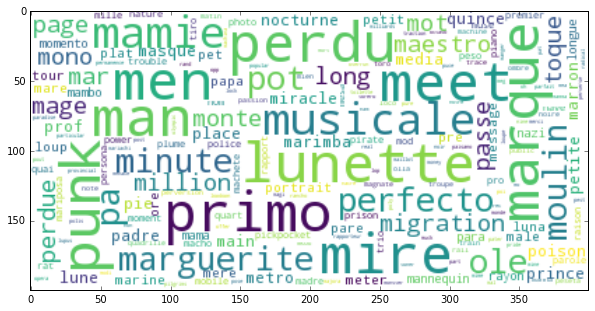

In [51]:
draw_wordcloud(merged_text)

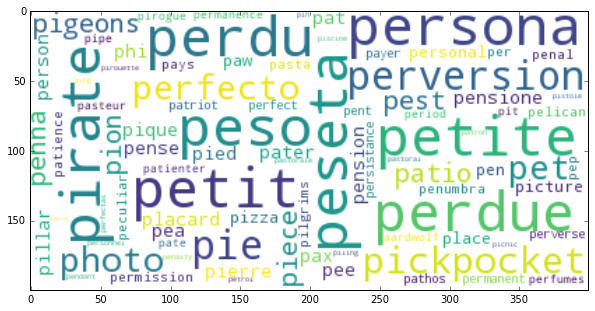

In [53]:
vectorizer = TfidfVectorizer(max_features=100)
vectorizer.fit_transform(text)
tokens = vectorizer.get_feature_names()
merged_text = ' '.join([i for i in tokens])

draw_wordcloud(merged_text)

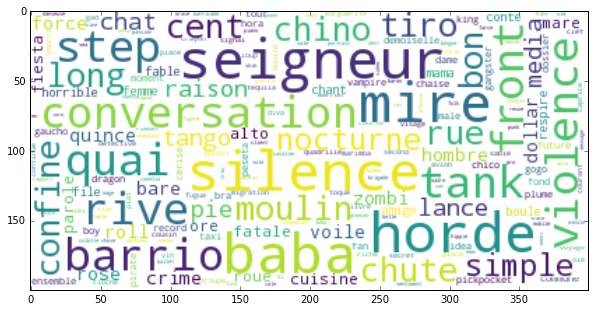

In [54]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit_transform(text)
tokens = vectorizer.get_feature_names()
merged_text = ' '.join([i for i in tokens])

draw_wordcloud(merged_text)

Answer  :
    
    
By changing the value of the max_features parameter we are 
   - limiting the number of significant words to be displayed in the wordcloud
   - lower max_features means top words with highest tfidf scores are displayed and the wordcloud 
     is also considerably more readable and percievable 